In [70]:
# Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.cluster import KMeans, AgglomerativeClustering
#from yellowbrick.cluster import KElbowVisualizer

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import classification_report




import warnings
warnings.filterwarnings("ignore")

In [71]:
# importing dataset

df= pd.read_excel("marketing_campaign1 (1).xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# **Exploratory Data Analysis**

In [72]:
# Checking the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [73]:
# Checking if there are any null entries

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Above we can see there are 24 null entries in the income column

In [74]:
# Dropping null entries
df=df.dropna()

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [75]:
# Checking if there are any duplicate values
df.duplicated().sum()

0

There are no duplicate values in the dataset.

In [76]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


# **Feature Engineering**

In [77]:
df["Purchases"]=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [78]:
# We are adding the new column of total spending by each ID

df["spendings"]= df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] +df['MntGoldProds']

In [79]:


df["Campaign"]=df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]

In [80]:

df=df.drop("MntWines", axis=1)
df=df.drop("MntFruits", axis=1)
df=df.drop("MntMeatProducts", axis=1)
df=df.drop("MntFishProducts", axis=1)
df=df.drop("MntSweetProducts", axis=1)
df=df.drop("MntGoldProds", axis=1)
df=df.drop("AcceptedCmp1", axis=1)
df=df.drop("AcceptedCmp2", axis=1)
df=df.drop("AcceptedCmp3", axis=1)
df=df.drop("AcceptedCmp4", axis=1)
df=df.drop("AcceptedCmp5", axis=1)

# Below entries dont seems to be relevant so we will drop the below columns also.

df=df.drop("ID", axis=1)
df=df.drop("NumWebVisitsMonth", axis=1)
df=df.drop("NumDealsPurchases", axis=1)
df=df.drop("NumWebPurchases", axis=1)
df=df.drop("NumCatalogPurchases", axis=1)
df=df.drop("Z_CostContact", axis=1)
df=df.drop("Z_Revenue", axis=1)
df=df.drop("NumStorePurchases", axis=1)
df=df.drop("Dt_Customer", axis=1)

In [81]:
# We are creating the new column of Age to identify from which age group the spending is coming

df["Age"]=2024-df["Year_Birth"]
df=df.drop("Year_Birth",axis=1)

In [82]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [83]:
df['Children'] = df['Kidhome']+df['Teenhome']
df=df.drop("Kidhome",axis=1)
df=df.drop("Teenhome",axis=1)

In [84]:
# Since there is lot of uncertain unique marital_states we will  create a new column and jot down to 2 unique status- Partner,Single

df["marital_Status"]=df["Marital_Status"].replace({"Married":"Partner","Together":"Partner","Divorced":"Single","Widow":"Single","Alone":"Single","Absurd":"Single","YOLO":"Single"})
df["marital_Status"].value_counts()
df=df.drop("Marital_Status",axis=1)

In [85]:
# Creating the feature column  parent

#df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [86]:

df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [91]:
# Similary there are lot of uncertain unique Education_background we will  create a new column and jot down to 3 unique status- under_grad, grad and post_grad

df['Education'] = df['Education'].replace(['2n Cycle', 'Basic'], 'Basic')
df['Education'] = df['Education'].replace(['Graduation', 'Master'], 'Graduated')
df['Education'] = df['Education'].replace(['PhD'], 'PHD')
df["Education"].value_counts()

Education
Graduated    1481
PHD           481
Basic         254
Name: count, dtype: int64

In [92]:
df.head()

,Education,Income,Recency,Complain,Response,Purchases,spendings,Campaign,Age,Children,marital_Status
0,Graduated,58138.0,58,0,1,25,1617,0,67,0,Single
1,Graduated,46344.0,38,0,0,6,27,0,70,2,Single
2,Graduated,71613.0,26,0,0,21,776,0,59,0,Partner
3,Graduated,26646.0,26,0,0,8,53,0,40,1,Partner
4,PHD,58293.0,94,0,0,19,422,0,43,1,Partner


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2216 non-null   object 
 1   Income          2216 non-null   float64
 2   Recency         2216 non-null   int64  
 3   Complain        2216 non-null   int64  
 4   Response        2216 non-null   int64  
 5   Purchases       2216 non-null   int64  
 6   spendings       2216 non-null   int64  
 7   Campaign        2216 non-null   int64  
 8   Age             2216 non-null   int64  
 9   Children        2216 non-null   int64  
 10  marital_Status  2216 non-null   object 
dtypes: float64(1), int64(8), object(2)
memory usage: 207.8+ KB


In [94]:
df.describe()

,Income,Recency,Complain,Response,Purchases,spendings,Campaign,Age,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,0.009477,0.150271,14.880866,607.075361,0.298285,55.179603,0.947202
std,25173.076661,28.948352,0.096907,0.357417,7.670957,602.900476,0.679209,11.985554,0.749062
min,1730.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,28.000000,0.000000
25%,35303.000000,24.000000,0.000000,0.000000,8.000000,69.000000,0.000000,47.000000,0.000000
50%,51381.500000,49.000000,0.000000,0.000000,15.000000,396.500000,0.000000,54.000000,1.000000
75%,68522.000000,74.000000,0.000000,0.000000,21.000000,1048.000000,0.000000,65.000000,1.000000
max,666666.000000,99.000000,1.000000,1.000000,44.000000,2525.000000,4.000000,131.000000,3.000000


**Visualization**

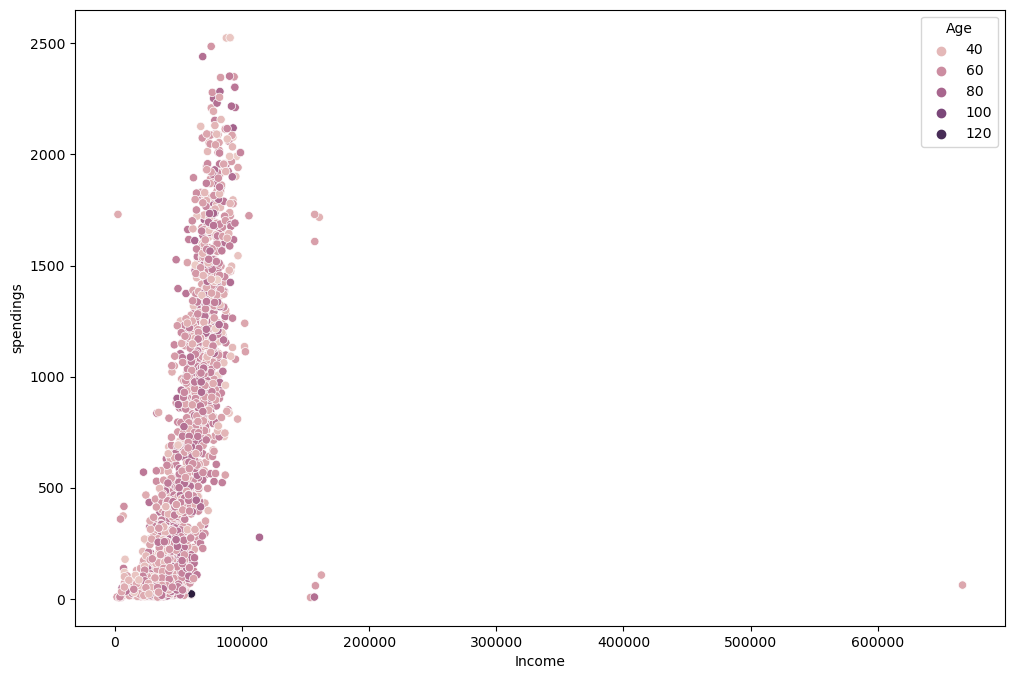

In [95]:
# Plotting scatter plot

plt.figure(figsize=(12,8))
sns.scatterplot(x="Income",y="spendings",data=df,hue="Age")
plt.show()

<Axes: xlabel='spendings', ylabel='Age'>

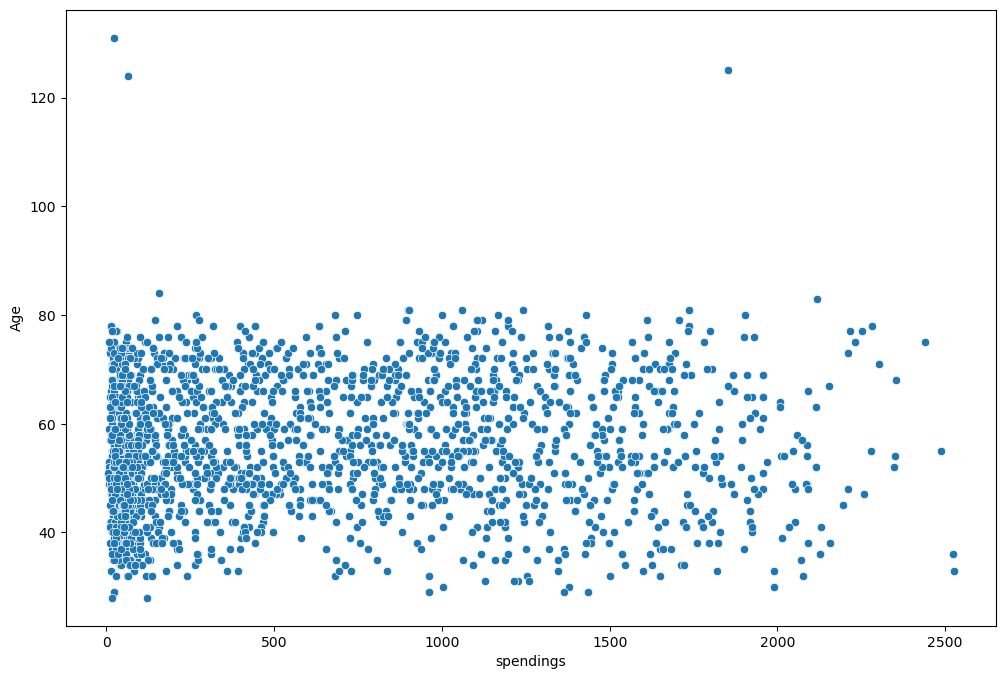

In [96]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="spendings",y="Age",data=df)

<Axes: xlabel='spendings', ylabel='Count'>

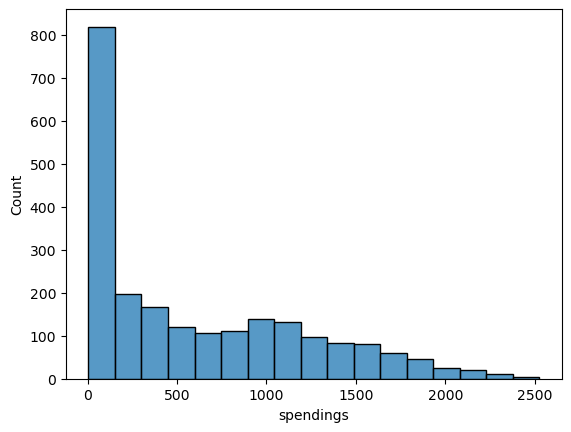

In [97]:
sns.histplot(df.spendings)

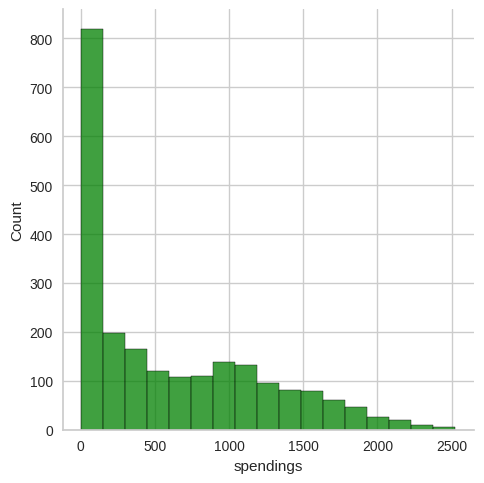

In [27]:
sns.displot(df.spendings,color="Green")
plt.show()

# **Identifing outliers**

<Figure size 1400x800 with 0 Axes>

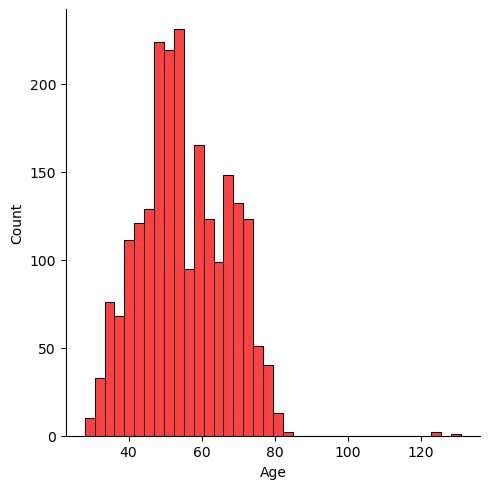

In [98]:
plt.figure(figsize=(14,8))
sns.displot(df["Age"],color="red")

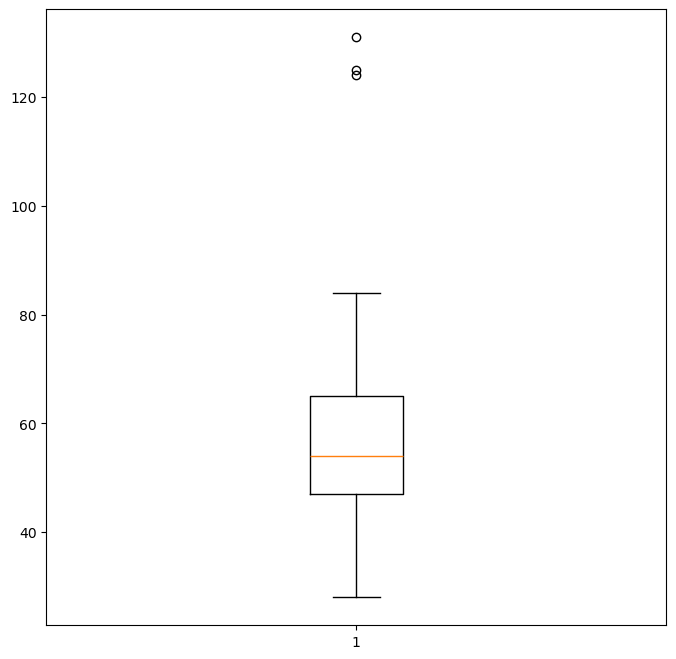

In [29]:
plt.figure(figsize=(8,8))
plt.boxplot(df["Age"])
plt.show()

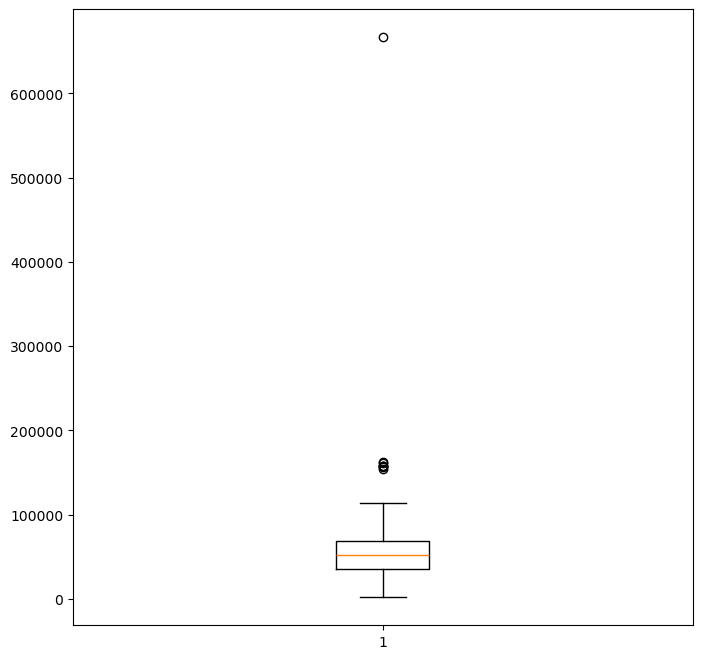

In [30]:
plt.figure(figsize=(8,8))
plt.boxplot(df["Income"])
plt.show()

**With above visulation we can see that there are outlier in Age column above 120,  this is because the data might be old and we have calculated the age with respect to current year and Income at 6lakh**

In [99]:
  #Dropping outliers

df=df[(df["Age"]<80)]
df=df[(df["Income"]<600000)]

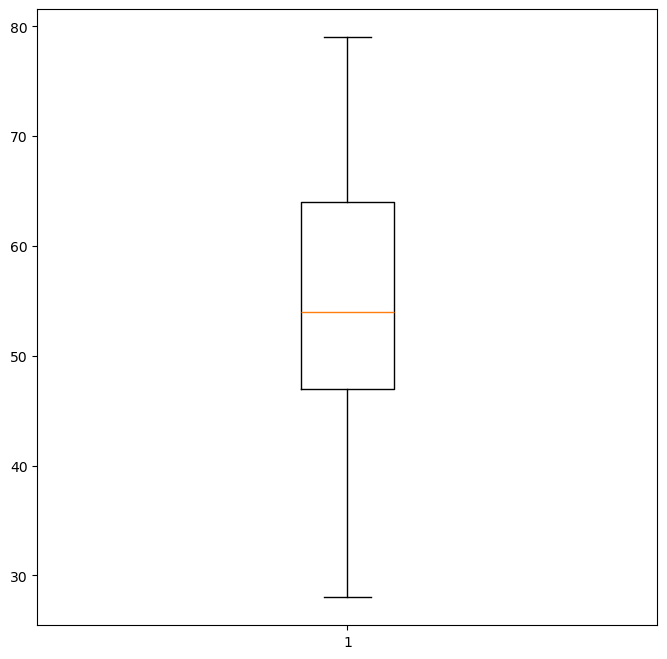

In [32]:
# plotting box plot to check the treated outliers
plt.figure(figsize=(8,8))
plt.boxplot(df["Age"])
plt.show()

#**Performing Data Preprocessing**

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()
scaler=StandardScaler()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2197 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2197 non-null   object 
 1   Income          2197 non-null   float64
 2   Recency         2197 non-null   int64  
 3   Complain        2197 non-null   int64  
 4   Response        2197 non-null   int64  
 5   Purchases       2197 non-null   int64  
 6   spendings       2197 non-null   int64  
 7   Campaign        2197 non-null   int64  
 8   Age             2197 non-null   int64  
 9   Children        2197 non-null   int64  
 10  marital_Status  2197 non-null   object 
dtypes: float64(1), int64(8), object(2)
memory usage: 206.0+ KB


In [102]:
# Label encoding on categorical data

df["Education"]=le.fit_transform(df["Education"])
df["marital_Status"]=le.fit_transform(df["marital_Status"])
df["Income"]=le.fit_transform(df["Income"])

In [36]:
df

,Education,Income,Recency,Complain,Response,Purchases,spendings,Campaign,Age,Children,marital_Status
0,0,1163,58,0,1,25,1617,0,67,0,1
1,0,830,38,0,0,6,27,0,70,2,1
2,0,1557,26,0,0,21,776,0,59,0,0
3,0,241,26,0,0,8,53,0,40,1,0
4,1,1166,94,0,0,19,422,0,43,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1245,46,0,0,18,1341,0,57,1,0
2236,1,1331,56,0,0,22,444,1,78,3,0
2237,0,1127,91,0,0,19,1241,1,43,0,1
2238,1,1481,8,0,0,23,843,0,68,1,0


In [103]:
from sklearn.preprocessing import normalize

In [104]:
df_scaled= normalize(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,Education,Income,Recency,Complain,Response,Purchases,spendings,Campaign,Age,Children,marital_Status
0,0.000502,0.583272,0.029088,0.0,0.000502,0.012538,0.810963,0.000000,0.033602,0.000000,0.000502
1,0.001199,0.994876,0.045549,0.0,0.000000,0.007192,0.032363,0.000000,0.083905,0.002397,0.001199
2,0.000574,0.894322,0.014934,0.0,0.000000,0.012062,0.445725,0.000000,0.033889,0.000000,0.000000
3,0.003977,0.958404,0.103396,0.0,0.000000,0.031814,0.210769,0.000000,0.159071,0.003977,0.000000
4,0.001607,0.936949,0.075535,0.0,0.000000,0.015268,0.339102,0.000000,0.034553,0.000804,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2192,0.000546,0.679811,0.025118,0.0,0.000000,0.009829,0.732230,0.000000,0.031124,0.000546,0.000000
2193,0.001422,0.946279,0.039813,0.0,0.000000,0.015641,0.315663,0.000711,0.055454,0.002133,0.000000
2194,0.000595,0.671035,0.054183,0.0,0.000000,0.011313,0.738913,0.000595,0.025603,0.000000,0.000595
2195,0.000586,0.868293,0.004690,0.0,0.000000,0.013485,0.494241,0.000000,0.039868,0.000586,0.000000


In [48]:
from sklearn.cluster import KMeans, AgglomerativeClustering
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


In [105]:
AC= AgglomerativeClustering(n_clusters=4)
ypred=AC.fit_predict(df_scaled)


In [106]:
# Adding the cluster column in the dataframe
df["Cluster"]=ypred

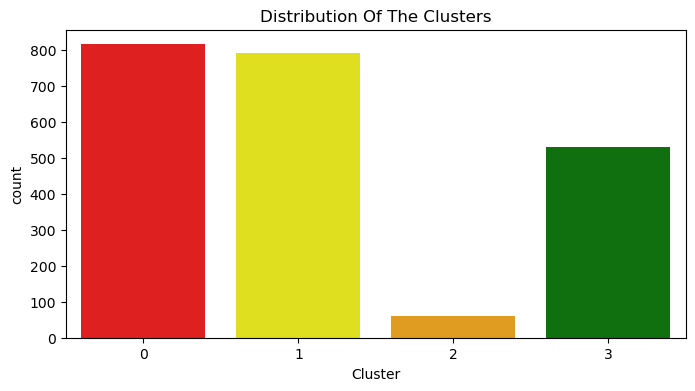

In [52]:
#Plotting the count plot

cl=["Red","yellow","orange","green"]
plt.figure(figsize=(8,4))
pl=sns.countplot(x=df['Cluster'],palette=cl)
pl.set_title('Distribution Of The Clusters')
plt.show()

**The motive of count plot is visualize the distribution of the data with refernce to clusters**

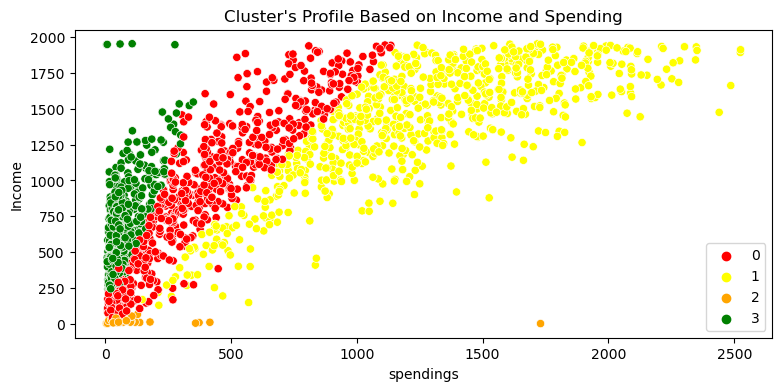

In [53]:
#Plotting the scatter plot to visualize the Income vs Spending to see the categories in clusters.

cl=["Red","yellow","orange","green"]
plt.figure(figsize=(9,4))
pl = sns.scatterplot(data=df, x=df['spendings'], y=df['Income'], hue=df['Cluster'],palette=cl)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()

**Outcome of the above visulation can be summarized  as**

Cluster 0 has lower income lowe spendings

Cluster 1 has low income average spending

Cluster 2 has average income high spendings

Cluster 3 has high income high spendings

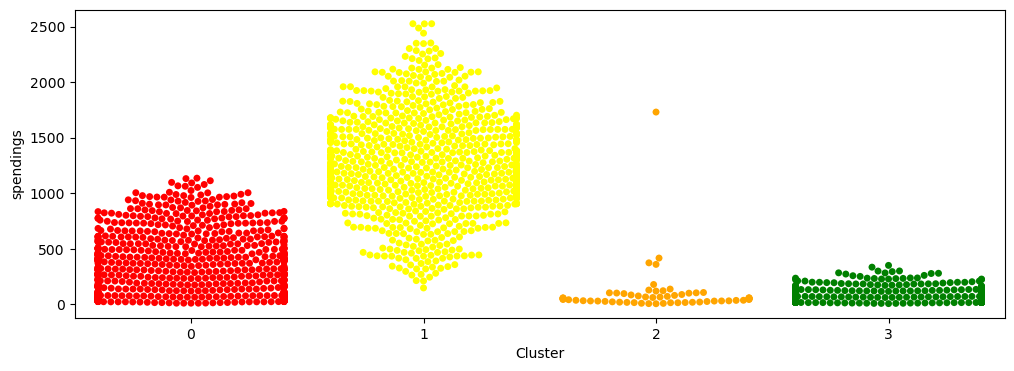

In [54]:
# Plotting the swarmplot
plt.figure(figsize=(12,4))
cl=["Red","yellow","orange","green"]
sns.swarmplot(x=df.Cluster,y=df.spendings,palette=cl)
plt.show()

**As we can clearly visulize from the above swarmplot that the cluster 2 are the group of customer who are spending more, from above plot we can design the strartegy for each set of cluster how we can increse the spending rate.**

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2197 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Education       2197 non-null   int32
 1   Income          2197 non-null   int64
 2   Recency         2197 non-null   int64
 3   Complain        2197 non-null   int64
 4   Response        2197 non-null   int64
 5   Purchases       2197 non-null   int64
 6   spendings       2197 non-null   int64
 7   Campaign        2197 non-null   int64
 8   Age             2197 non-null   int64
 9   Children        2197 non-null   int64
 10  marital_Status  2197 non-null   int32
 11  Cluster         2197 non-null   int64
dtypes: int32(2), int64(10)
memory usage: 206.0 KB


**Training and Testing the model accuracy using decision tree**

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# Splitting data into x and Y variables

x=df.drop(["Cluster"],axis=1)
y=df.Cluster

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [110]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state = 10)

model.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [111]:
# Checking the model Accuracy
model.score(xtest,ytest)

0.8454545454545455

In [112]:
# Confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report

print(metrics.confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

[[204  14   0  22]
 [ 42 201   0   0]
 [ 12   0   0   2]
 [ 10   0   0 153]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       240
           1       0.93      0.83      0.88       243
           2       0.00      0.00      0.00        14
           3       0.86      0.94      0.90       163

    accuracy                           0.85       660
   macro avg       0.64      0.65      0.65       660
weighted avg       0.83      0.85      0.84       660



**Saving the DecisionTree Model for future prediction.**

In [113]:
import pickle

pickle.dump(model,open("mark.pkl","wb"))

In [114]:
df["Education"].value_counts()

Education
1    1473
2     472
0     252
Name: count, dtype: int64